## Change Failure Analysis

#### Getting the system ready and loading the data

In [48]:
## Load Packages
import pandas as pd
import numpy as np                # For Mathematical calculations
import seaborn as sns             # For data Visualization
import matplotlib.pyplot as plt   # For Plotting Graphs
%matplotlib inline
import warnings                   # To Ignore any warnings
warnings.filterwarnings("ignore")

In [49]:
## Reading the Data
cf = pd.read_csv("cf.csv")
cf.head()

,Week_Dt,Week_Num,Account Name,Sector,Change implementation Date,Change implementation Day,Change closure Date,Change #,Team,Change Owner Notes ID,...,Location,Location 2,"Normal, Emergency or Expedited Change",Change Risk Level,Validation By SM,Code1,SubCode1,Reason for failure,Client Impact,Additional Comments
0,20190104,Week -01 (19),AECOM,IND,20-12-2018,Thu,03-01-2019,CHG0037879,I-ACM-SS_Virtualization-XX,Ariel Eduardo Schivo/Argentina/IBM,...,Argentina: Buenos Aires,Non CIC,Normal,Medium,NaN,NaN,NaN,Process: Change Management,NO,Unauthorized: Approved late
1,20190104,Week -01 (19),AECOM,IND,03-01-2019,Thu,04-01-2019,CHG0037956,I-ACM-IT Infrastructure Storage Non Itar - US,Ariel Pastorino/Argentina/IBM,...,Argentina: Buenos Aires,Non CIC,Emergency,Medium,NaN,NaN,NaN,Process: Change Management,NO,Change implemented outside window
2,20190104,Week -01 (19),Ameriprise Financial,FSS,04-01-2019,Fri,05-01-2019,CHG0523231,IBM US Network Infrastructure,Neeraj K Jha/India/IBM,...,Non-GDF: Other,Non CIC,Normal,Minor,NaN,NaN,NaN,NaN,Yes,Unexpected impact to application
3,20190104,Week -01 (19),VF,DIS,02-01-2019,Wed,03-01-2019,CHG0026303,IGS-VFDB2UDB,Santhosh Vanathu/India/IBM,...,Non-GDF: Other,Non CIC,Emergency,Critical/High,NaN,NaN,NaN,People: Decision making error,NO,Unauthorized change - Verbal approval was gran...
4,20190104,Week -01 (19),VF,DIS,15-12-2018,Sat,03-01-2019,CHG0026121,IGS-VFUNIX,Sathiya R Kamaraj/India/IBM,...,India: Chennai,CIC,Expedited,Minor,NaN,NaN,NaN,People: Decision making error,NO,Failed Change - Change closed as implemented u...


In [50]:
## Filter the Data only by CIC
cf_cic = cf[cf['Location 2']== 'CIC' ]
cf_cic.head()

,Week_Dt,Week_Num,Account Name,Sector,Change implementation Date,Change implementation Day,Change closure Date,Change #,Team,Change Owner Notes ID,...,Location,Location 2,"Normal, Emergency or Expedited Change",Change Risk Level,Validation By SM,Code1,SubCode1,Reason for failure,Client Impact,Additional Comments
4,20190104,Week -01 (19),VF,DIS,15-12-2018,Sat,03-01-2019,CHG0026121,IGS-VFUNIX,Sathiya R Kamaraj/India/IBM,...,India: Chennai,CIC,Expedited,Minor,NaN,NaN,NaN,People: Decision making error,NO,Failed Change - Change closed as implemented u...
6,20190111,Week -02 (19),"Delhaize America Shared Services Group, LLC",DIS,07-01-2019,Mon,11-01-2019,CHG0064982,IBM-Wintel-Support,Dennis Clement/India/IBM,...,India: Chennai,CIC,Normal,Minor,NaN,NaN,NaN,People: Decision making error,NO,Change implemented before schedule start
7,20190111,Week -02 (19),Fluor,IND,06-12-2018,Thu,09-01-2019,CH138610,FLR-I-SSOGSBF,Narendra J1/India/IBM,...,India: Bangalore,CIC,Normal,Medium,NaN,NaN,NaN,Process: Change Management,NO,Unauthorized change - FLR-I-SSOGSBF group appr...
8,20190111,Week -02 (19),Fluor,IND,07-01-2019,Mon,11-01-2019,CH140034,FLR-I-SSOGSBF,Ravikumar Medidi/India/IBM,...,India: Hyderabad,CIC,Normal,Minor,NaN,NaN,NaN,Process: Change Management,NO,Unauthorized change - FLR-I-SDMHODPE group app...
9,20190111,Week -02 (19),Fluor,IND,07-01-2019,Mon,07-01-2019,CH140017,FLR-I-SSOGXVMWR,Bharathsimha R Jataprole1/India/IBM,...,India: Hyderabad,CIC,Normal,Minor,NaN,NaN,NaN,Process: Change Management,NO,Unauthorized change - FLR-I-DNI-NET & FLR-I-SD...


In [51]:
# Check the shape
cf_cic.shape

(63, 22)

### Univariant Analysis

In [52]:
## Will look into the Accounts with More than or equal to 2 Failed Changes
cf_cic['Account Name '].value_counts()

Fluor                                                         15
Chrysler                                                       4
Blackboard                                                     4
AECOM                                                          3
BMO Harris                                                     3
VF                                                             3
BNSF                                                           3
Delhaize America Shared Services Group, LLC                    2
Air Canada                                                     2
Manulife                                                       2
Irving Oil                                                     2
Altria                                                         2
NYK Business Systems Americas Inc                              2
New Avon                                                       2
Michelin NA                                                    2
Element Vehicle Managemen

In [53]:
cf_cic['Account Name '].value_counts(normalize=True) # Note there is a White Space in "Account Name"

Fluor                                                         0.238095
Chrysler                                                      0.063492
Blackboard                                                    0.063492
AECOM                                                         0.047619
BMO Harris                                                    0.047619
VF                                                            0.047619
BNSF                                                          0.047619
Delhaize America Shared Services Group, LLC                   0.031746
Air Canada                                                    0.031746
Manulife                                                      0.031746
Irving Oil                                                    0.031746
Altria                                                        0.031746
NYK Business Systems Americas Inc                             0.031746
New Avon                                                      0.031746
Michel

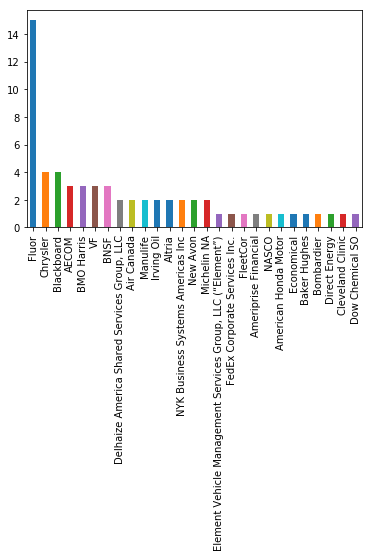

In [54]:
cf_cic['Account Name '].value_counts().plot.bar()

### Univariant Analysis - Conclusion

- **1. Will look into the accounts with greater than or equal to 2 Failed changes.**
- **2. 15 out 27 accounts have 2 or more failed changes in 2019.**
- **3. Floure - 15, Blackboard & Chrysler - 4 , VF,BNSF,BMO Harris, AECOM - 3.**
- **4. 7 Accounts out of 27 Accounts have contributed to 35 Failed changes which is 56% of the Failed change Volume.**
- **5. 8 Accounts have minimum 2 Failed Changes.**
- **6. 15 Accounts out 27 accoutns for 51 Failed Changes which is 81% of the Failed change Volume**

## Bivariant Analysis

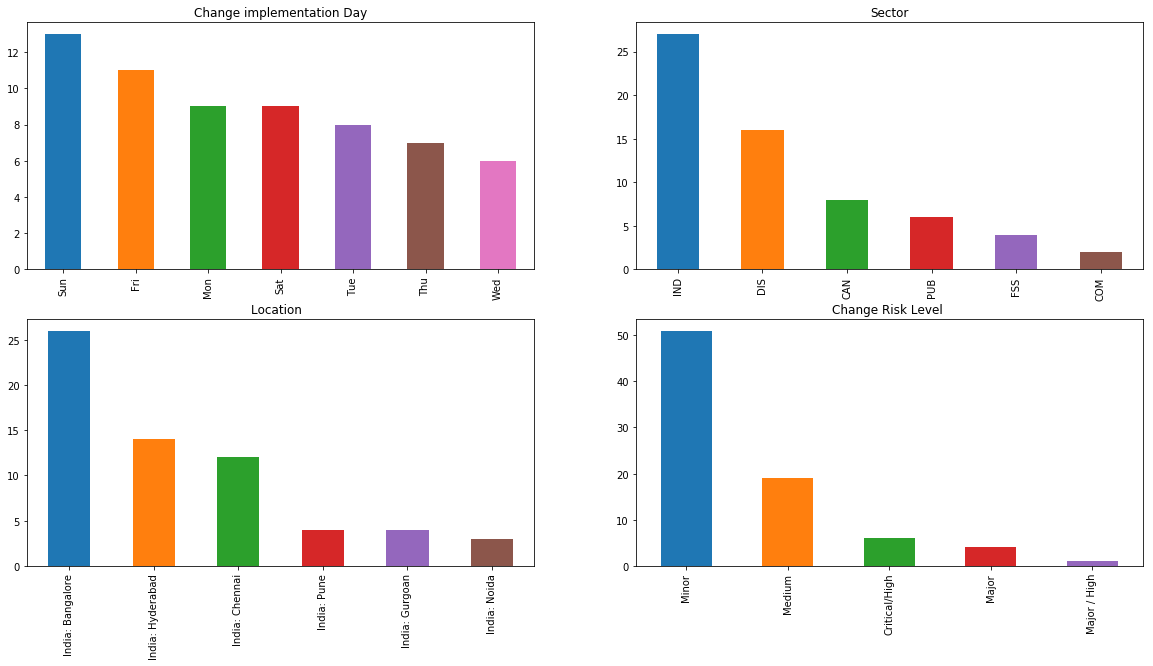

In [63]:
## Change Implementation Day vs Failed Changes
plt.figure(1)
plt.subplot(221)
cf_cic['Change implementation Day'].value_counts().plot.bar(figsize = (20,10), title = 'Change implementation Day')

#Sector Vs Change Failures
plt.subplot(222)
cf_cic['Sector'].value_counts().plot.bar(figsize = (20,10), title = 'Sector')

#Location Vs Change Failures
plt.subplot(223)
cf_cic['Location  '].value_counts().plot.bar(figsize = (20,10), title = 'Location  ')

#Normal, Emergency or Expedited Change Vs Change Failures
plt.subplot(224)
cf_cic['Normal, Emergency or Expedited Change '].value_counts().plot.bar(figsize = (20,10), title = 'Normal, Emergency or Expedited Change ')


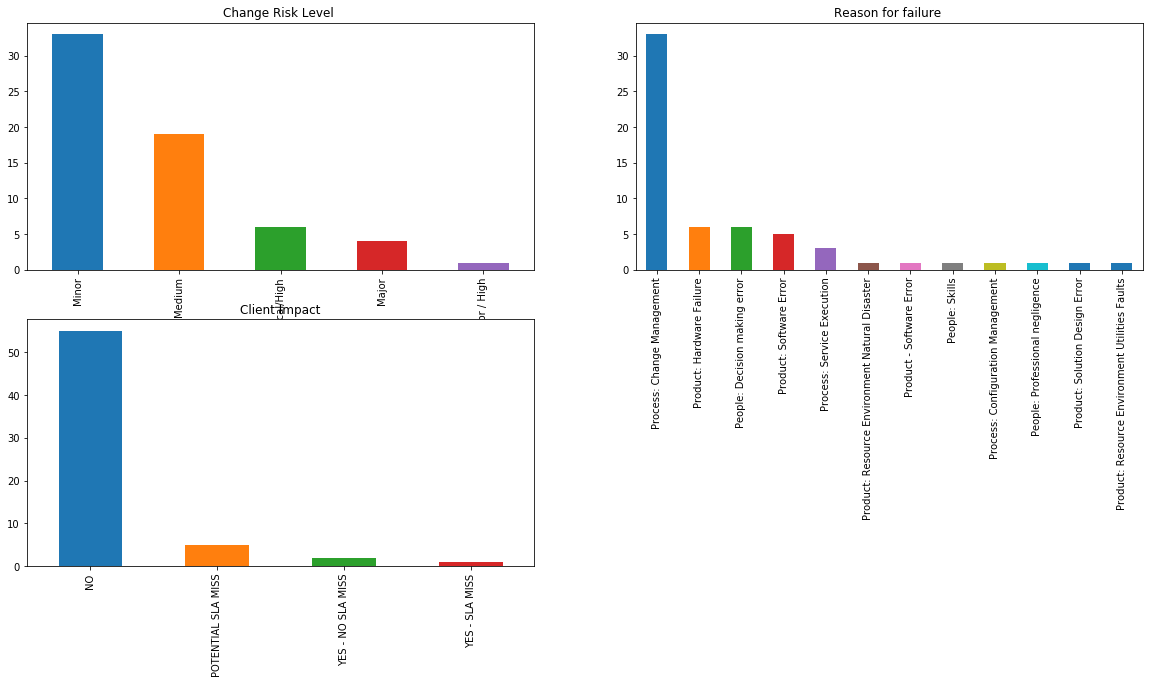

In [67]:
## Risklevel Vs Failed Changes
plt.figure(1)
plt.subplot(221)
cf_cic['Change Risk Level '].value_counts().plot.bar(figsize = (20,10), title = 'Change Risk Level ')

## Reason For Failure Vs Failed Changes
plt.subplot(222)
cf_cic['Reason for failure '].value_counts().plot.bar(figsize = (20,10), title = 'Reason for failure ')

## Client Impact Vs Failed Changes
plt.subplot(223)
cf_cic['Client Impact'].value_counts().plot.bar(figsize = (20,10), title = 'Client Impact')

plt.show()

### Bivariant Analysis - Conclusion

- 1.***Change Implementation Day Vs No.of Failed Changes - Its Not Significant***
- 2.***Sector Vs No.of Failed Changes: Both IND & DIS Sec have contributed to around 43 Failed changes out of 63***
- 3.***Location Vs No.of Failed Changes : Banglore & Hyderabad (40) Contributed to 26 & 14 Failed changes repectively***
- 4.***Normal, Emergency or Expedited Change Vs No.of Failed Changes: 51 Normal Changes failed***
- 5.***Risklevel Vs Failed Changes : Medium-19 and Minor-33,both Contribute to 52 Failed changes out of 63***
- 6.***Reason For Failure Vs No.of Failed Changes : 33 failed changes realted to Changemgmt and 6 Decision Making error.***	
- 7.***Client Impact Vs No.of Failed Changes : 55 out 63 "No Client Impact" changes have been failed***

## My Conclusion based on the data

### Priority 1 : Both Industrail and Distribution Sectors from Banglore and Hyderabad Location Need to be trained on Change Manamgent